# EDA Overzicht - VKM Dataset
## Uitgebreide Verkennende Data Analyse

Dit notebook biedt een grondige verkenning van de Uitgebreide VKM dataset door:
1. **Univariate Analyse** - Patronen in individuele variabelen
2. **Bivariate Analyse** - Relaties tussen paren van variabelen
3. **Multivariate Analyse** - Complexe patronen tussen meerdere variabelen
4. **Data Kwaliteit Beoordeling** - Uitschieters en afwijkingen

In [1]:
# 1. DATA INLADEN EN INSPECTEREN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Data inladen
df = pd.read_csv('Uitgebreide_VKM_dataset_cleaned.csv')

print("=" * 60)
print("DATASETOVERZICHT")
print("=" * 60)
print(f"\nAfmetingen: {df.shape[0]} rijen, {df.shape[1]} kolommen")
print(f"\nGegevenstypen:\n{df.dtypes}")
print(f"\nOntbrekende Waarden:\n{df.isnull().sum()}")
print(f"\nBasische Statistieken:")
print(df.describe())

DATASETOVERZICHT

Afmetingen: 211 rijen, 20 kolommen

Gegevenstypen:
id                          int64
name                       object
shortdescription           object
description                object
content                    object
studycredit                 int64
location                   object
contact_id                  int64
level                      object
learningoutcomes           object
module_tags                object
interests_match_score     float64
popularity_score            int64
estimated_difficulty        int64
available_spots             int64
start_date                 object
shortdescription_clean     object
description_clean          object
content_clean              object
learningoutcomes_clean     object
dtype: object

Ontbrekende Waarden:
id                        0
name                      0
shortdescription          0
description               0
content                   0
studycredit               0
location                  0
contact_id         

## 1. UNIVARIATE ANALYSE
Analyse van individuele variabelen om hun verdelingen, centrale tendenties en variabiliteit te begrijpen

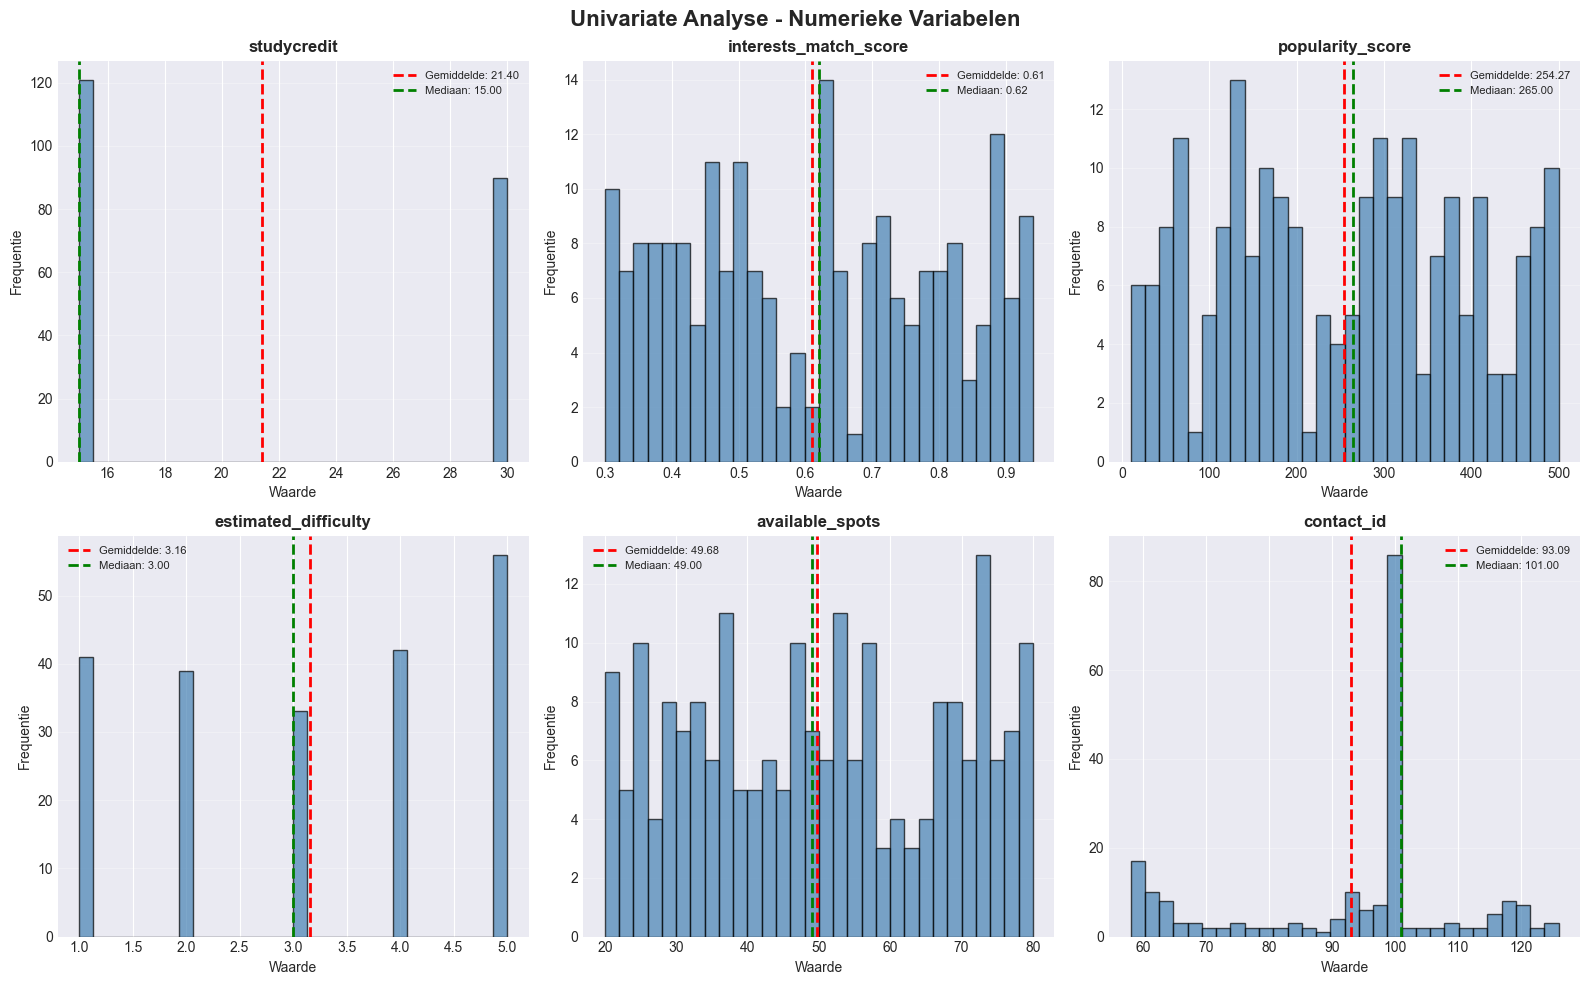


UNIVARIATE STATISTIEKEN - NUMERIEKE VARIABELEN

studycredit:
  Gemiddelde: 21.40
  Mediaan: 15.00
  Standaardafwijking: 7.44
  Minimum: 15.00
  Maximum: 30.00
  Q1 (25%): 15.00
  Q3 (75%): 30.00
  Scheefheid: 0.30
  Kurtose: -1.91

interests_match_score:
  Gemiddelde: 0.61
  Mediaan: 0.62
  Standaardafwijking: 0.19
  Minimum: 0.30
  Maximum: 0.94
  Q1 (25%): 0.44
  Q3 (75%): 0.78
  Scheefheid: 0.09
  Kurtose: -1.29

popularity_score:
  Gemiddelde: 254.27
  Mediaan: 265.00
  Standaardafwijking: 141.70
  Minimum: 10.00
  Maximum: 500.00
  Q1 (25%): 135.50
  Q3 (75%): 374.00
  Scheefheid: 0.04
  Kurtose: -1.17

estimated_difficulty:
  Gemiddelde: 3.16
  Mediaan: 3.00
  Standaardafwijking: 1.49
  Minimum: 1.00
  Maximum: 5.00
  Q1 (25%): 2.00
  Q3 (75%): 5.00
  Scheefheid: -0.14
  Kurtose: -1.41

available_spots:
  Gemiddelde: 49.68
  Mediaan: 49.00
  Standaardafwijking: 17.96
  Minimum: 20.00
  Maximum: 80.00
  Q1 (25%): 34.00
  Q3 (75%): 67.00
  Scheefheid: 0.03
  Kurtose: -1.24

contac

In [ ]:
# 1.1 NUMERIEKE VARIABELEN - Histogrammen en Statistieken
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Univariate Analyse - Numerieke Variabelen', fontsize=16, fontweight='bold')

numerical_cols = ['studycredit', 'interests_match_score', 'popularity_score', 
                  'estimated_difficulty', 'available_spots']

for idx, col in enumerate(numerical_cols):
    ax = axes[idx // 3, idx % 3]
    ax.hist(df[col], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    ax.set_title(f'{col}', fontweight='bold')
    ax.set_xlabel('Waarde')
    ax.set_ylabel('Frequentie')
    ax.grid(axis='y', alpha=0.3)
    
    # Voeg statistieken toe
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Gemiddelde: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediaan: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

# Gedetailleerde statistieken voor numerieke variabelen
print("\n" + "=" * 60)
print("UNIVARIATE STATISTIEKEN - NUMERIEKE VARIABELEN")
print("=" * 60)
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Gemiddelde: {df[col].mean():.2f}")
    print(f"  Mediaan: {df[col].median():.2f}")
    print(f"  Standaardafwijking: {df[col].std():.2f}")
    print(f"  Minimum: {df[col].min():.2f}")
    print(f"  Maximum: {df[col].max():.2f}")
    print(f"  Q1 (25%): {df[col].quantile(0.25):.2f}")
    print(f"  Q3 (75%): {df[col].quantile(0.75):.2f}")
    print(f"  Scheefheid: {stats.skew(df[col]):.2f}")
    print(f"  Kurtose: {stats.kurtosis(df[col]):.2f}")

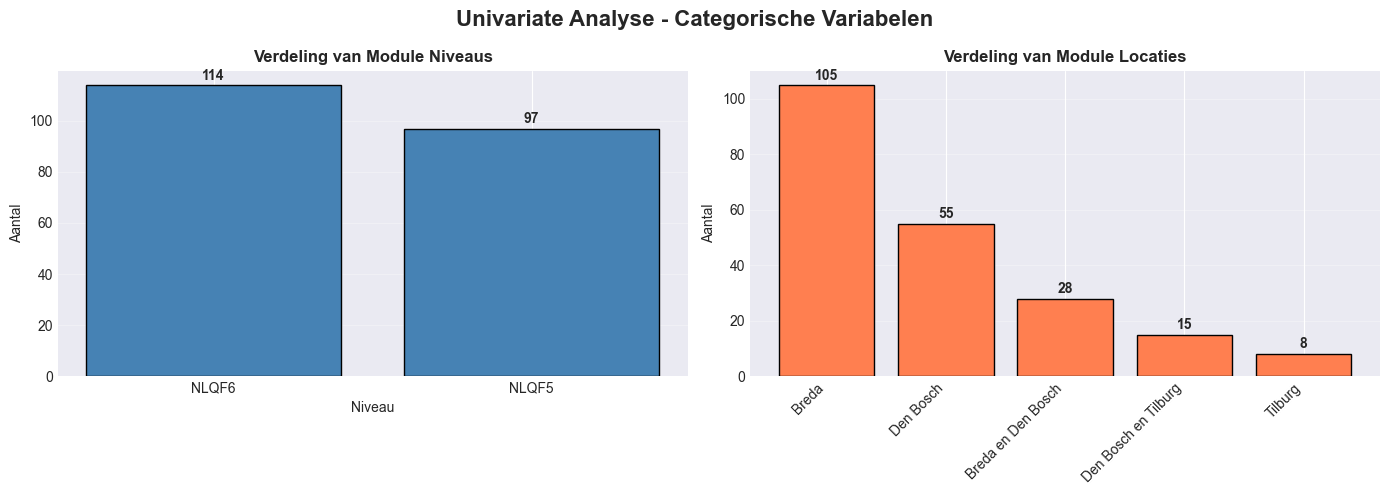


UNIVARIATE STATISTIEKEN - CATEGORISCHE VARIABELEN

Niveauverdeling:
level
NLQF6    114
NLQF5     97
Name: count, dtype: int64

Locatieverdeling:
location
Breda                   105
Den Bosch                55
Breda en Den Bosch       28
Den Bosch en Tilburg     15
Tilburg                   8
Name: count, dtype: int64

Studiekredieten verdeling:
studycredit
15    121
30     90
Name: count, dtype: int64


In [4]:
# 1.2 CATEGORISCHE VARIABELEN - Staafdiagrammen
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Univariate Analyse - Categorische Variabelen', fontsize=16, fontweight='bold')

# Niveauverdeling
level_counts = df['level'].value_counts()
axes[0].bar(level_counts.index, level_counts.values, color='steelblue', edgecolor='black')
axes[0].set_title('Verdeling van Module Niveaus', fontweight='bold')
axes[0].set_xlabel('Niveau')
axes[0].set_ylabel('Aantal')
for i, v in enumerate(level_counts.values):
    axes[0].text(i, v + 2, str(v), ha='center', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Locatieverdeling
location_counts = df['location'].value_counts()
axes[1].bar(range(len(location_counts)), location_counts.values, color='coral', edgecolor='black')
axes[1].set_xticks(range(len(location_counts)))
axes[1].set_xticklabels(location_counts.index, rotation=45, ha='right')
axes[1].set_title('Verdeling van Module Locaties', fontweight='bold')
axes[1].set_ylabel('Aantal')
for i, v in enumerate(location_counts.values):
    axes[1].text(i, v + 2, str(v), ha='center', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("UNIVARIATE STATISTIEKEN - CATEGORISCHE VARIABELEN")
print("=" * 60)
print(f"\nNiveauverdeling:")
print(df['level'].value_counts())
print(f"\nLocatieverdeling:")
print(df['location'].value_counts())
print(f"\nStudiekredieten verdeling:")
print(df['studycredit'].value_counts().sort_index())

## 2. BIVARIATE ANALYSE
Underzoeken van relaties tussen paren van variabelen

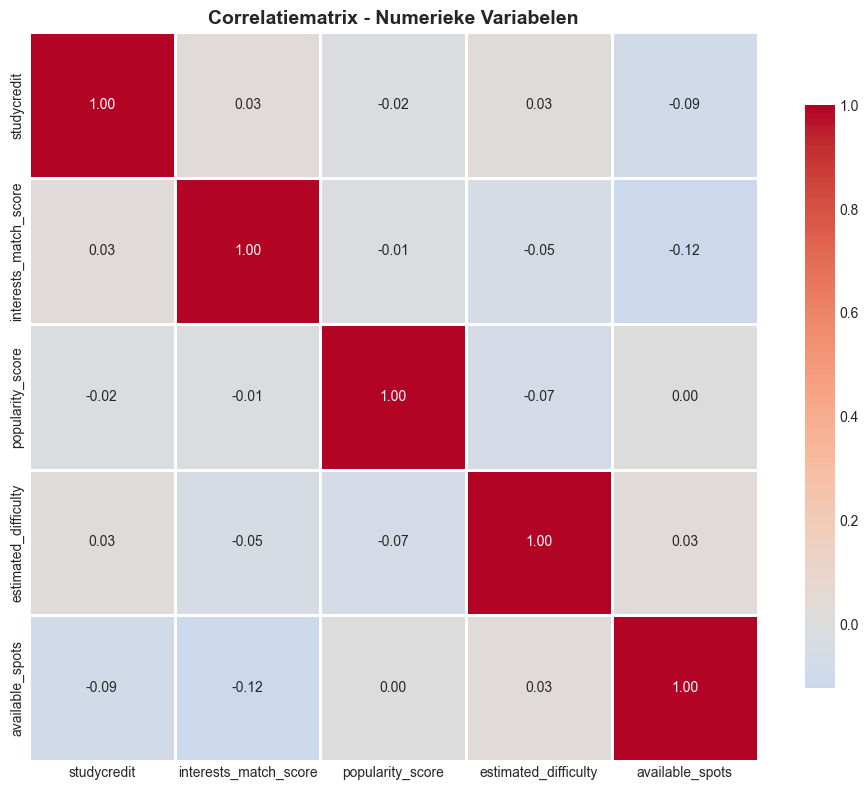


CORRELATIE ANALYSE

Correlatiematrix:
                       studycredit  interests_match_score  popularity_score  \
studycredit               1.000000               0.029374         -0.017413   
interests_match_score     0.029374               1.000000         -0.013143   
popularity_score         -0.017413              -0.013143          1.000000   
estimated_difficulty      0.025362              -0.051648         -0.066788   
available_spots          -0.090379              -0.122522          0.001422   

                       estimated_difficulty  available_spots  
studycredit                        0.025362        -0.090379  
interests_match_score             -0.051648        -0.122522  
popularity_score                  -0.066788         0.001422  
estimated_difficulty               1.000000         0.027943  
available_spots                    0.027943         1.000000  

Sterkste Positieve Correlaties:


In [5]:
# 2.1 CORRELATIEMATRIX
# Selecteer numerieke kolommen voor correlatie
numerical_features = ['studycredit', 'interests_match_score', 'popularity_score', 
                      'estimated_difficulty', 'available_spots']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlatiematrix - Numerieke Variabelen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("CORRELATIE ANALYSE")
print("=" * 60)
print(f"\nCorrelatiematrix:\n{correlation_matrix}")

# Vind sterkste correlaties
print("\nSterkste Positieve Correlaties:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            print(f"  {col1} <-> {col2}: {corr_val:.3f}")

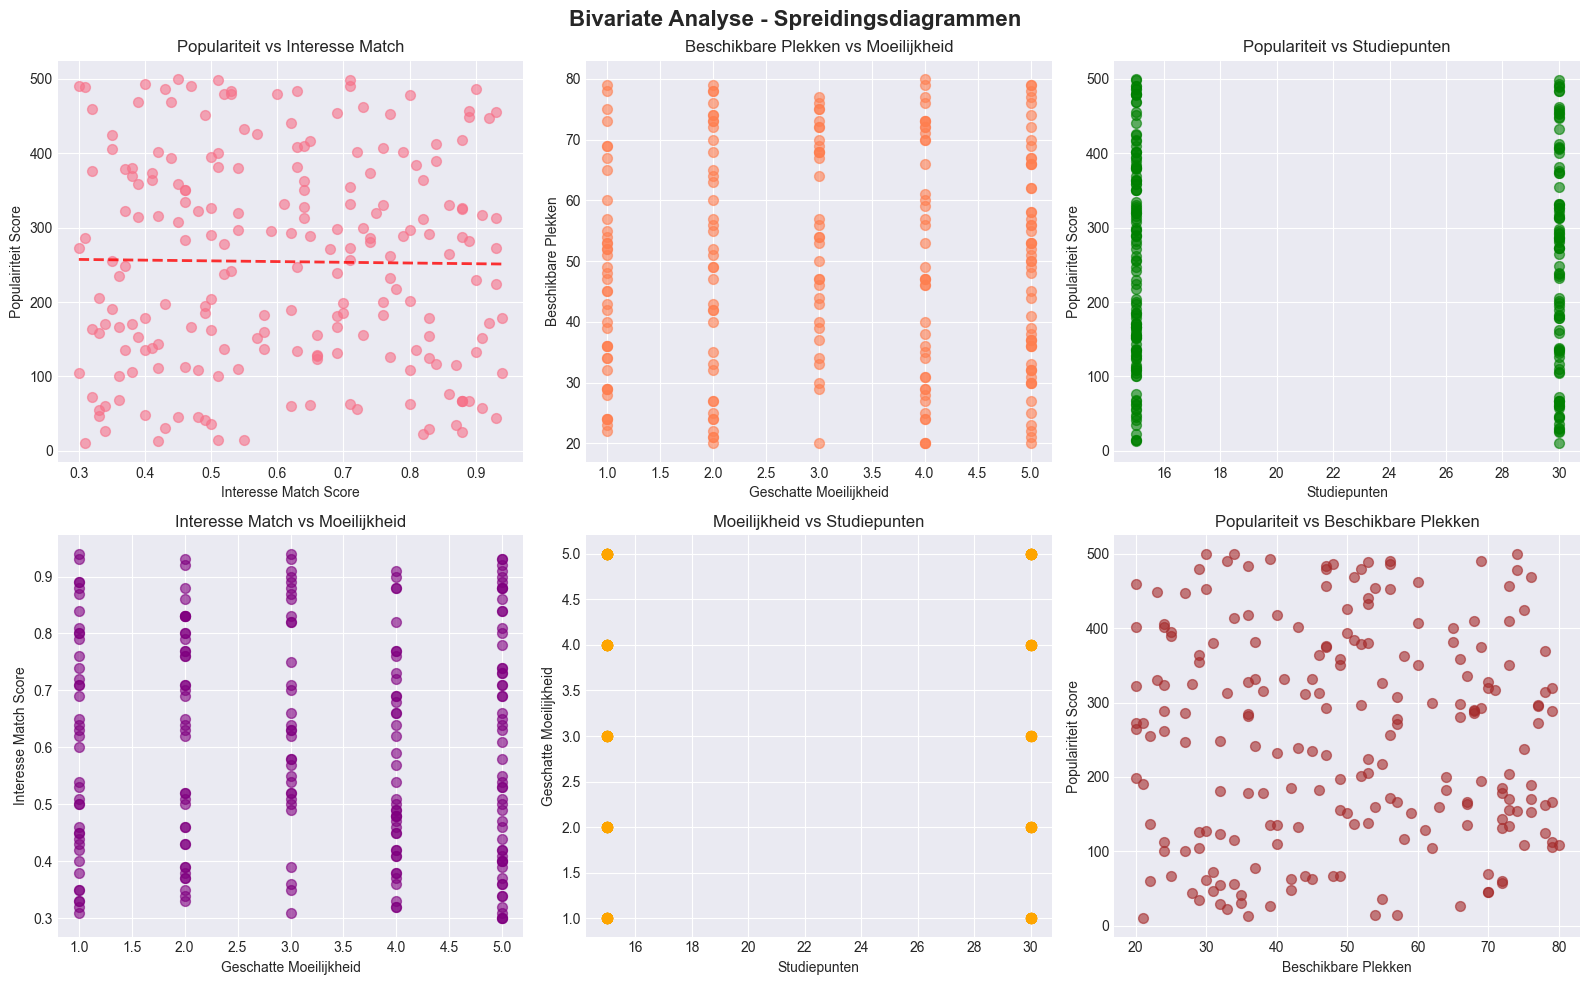

In [6]:
# 2.2 SPREIDINGSDIAGRAMMEN - Belangrijkste Numerieke Relaties
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Bivariate Analyse - Spreidingsdiagrammen', fontsize=16, fontweight='bold')

# Populariteit vs Interesse Match
axes[0, 0].scatter(df['interests_match_score'], df['popularity_score'], alpha=0.6, s=50)
axes[0, 0].set_xlabel('Interesse Match Score')
axes[0, 0].set_ylabel('Populairiteit Score')
axes[0, 0].set_title('Populariteit vs Interesse Match')
z = np.polyfit(df['interests_match_score'], df['popularity_score'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df['interests_match_score'].sort_values(), p(df['interests_match_score'].sort_values()), 
                "r--", alpha=0.8, linewidth=2)

# Moeilijkheid vs Beschikbare Plekken
axes[0, 1].scatter(df['estimated_difficulty'], df['available_spots'], alpha=0.6, s=50, color='coral')
axes[0, 1].set_xlabel('Geschatte Moeilijkheid')
axes[0, 1].set_ylabel('Beschikbare Plekken')
axes[0, 1].set_title('Beschikbare Plekken vs Moeilijkheid')

# Studiepunten vs Populariteit
axes[0, 2].scatter(df['studycredit'], df['popularity_score'], alpha=0.6, s=50, color='green')
axes[0, 2].set_xlabel('Studiepunten')
axes[0, 2].set_ylabel('Populairiteit Score')
axes[0, 2].set_title('Populariteit vs Studiepunten')

# Moeilijkheid vs Interesse Match
axes[1, 0].scatter(df['estimated_difficulty'], df['interests_match_score'], alpha=0.6, s=50, color='purple')
axes[1, 0].set_xlabel('Geschatte Moeilijkheid')
axes[1, 0].set_ylabel('Interesse Match Score')
axes[1, 0].set_title('Interesse Match vs Moeilijkheid')

# Studiepunten vs Moeilijkheid
axes[1, 1].scatter(df['studycredit'], df['estimated_difficulty'], alpha=0.6, s=50, color='orange')
axes[1, 1].set_xlabel('Studiepunten')
axes[1, 1].set_ylabel('Geschatte Moeilijkheid')
axes[1, 1].set_title('Moeilijkheid vs Studiepunten')

# Beschikbare Plekken vs Populariteit
axes[1, 2].scatter(df['available_spots'], df['popularity_score'], alpha=0.6, s=50, color='brown')
axes[1, 2].set_xlabel('Beschikbare Plekken')
axes[1, 2].set_ylabel('Populairiteit Score')
axes[1, 2].set_title('Populariteit vs Beschikbare Plekken')

plt.tight_layout()
plt.show()

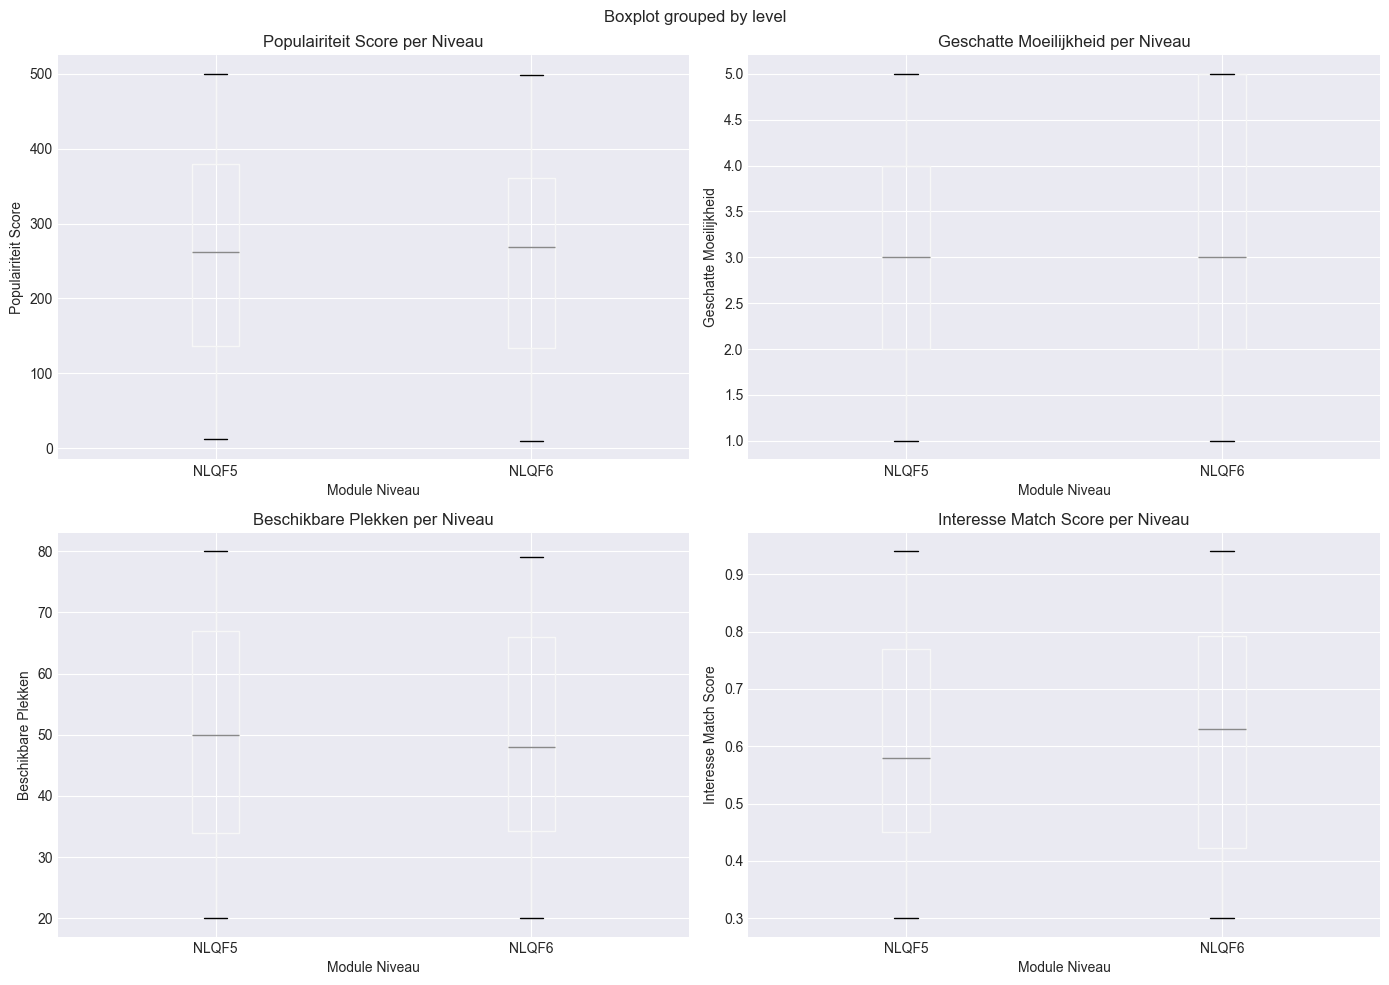


CATEGORISCHE GROEPANALYSE

Populariteit Score per Niveau:
             mean  median         std  count
level                                       
NLQF5  258.865979   262.0  141.371086     97
NLQF6  250.350877   269.0  142.491918    114

Populariteit Score per Locatie:
                            mean  median         std  count
location                                                   
Breda                 258.561905   278.0  140.190250    105
Breda en Den Bosch    213.535714   174.5  150.042582     28
Den Bosch             265.709091   289.0  137.885174     55
Den Bosch en Tilburg  264.333333   200.0  149.154602     15
Tilburg               242.875000   244.5  155.250431      8


In [7]:
# 2.3 BOXPLOTS - Categorische vs Numerieke Relaties
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analyse - Categorisch vs Numeriek', fontsize=16, fontweight='bold')

# Populariteit per Niveau
df.boxplot(column='popularity_score', by='level', ax=axes[0, 0])
axes[0, 0].set_title('Populairiteit Score per Niveau')
axes[0, 0].set_xlabel('Module Niveau')
axes[0, 0].set_ylabel('Populairiteit Score')

# Moeilijkheid per Niveau
df.boxplot(column='estimated_difficulty', by='level', ax=axes[0, 1])
axes[0, 1].set_title('Geschatte Moeilijkheid per Niveau')
axes[0, 1].set_xlabel('Module Niveau')
axes[0, 1].set_ylabel('Geschatte Moeilijkheid')

# Beschikbare Plekken per Niveau
df.boxplot(column='available_spots', by='level', ax=axes[1, 0])
axes[1, 0].set_title('Beschikbare Plekken per Niveau')
axes[1, 0].set_xlabel('Module Niveau')
axes[1, 0].set_ylabel('Beschikbare Plekken')

# Interesse Match per Niveau
df.boxplot(column='interests_match_score', by='level', ax=axes[1, 1])
axes[1, 1].set_title('Interesse Match Score per Niveau')
axes[1, 1].set_xlabel('Module Niveau')
axes[1, 1].set_ylabel('Interesse Match Score')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("CATEGORISCHE GROEPANALYSE")
print("=" * 60)
print("\nPopulariteit Score per Niveau:")
print(df.groupby('level')['popularity_score'].agg(['mean', 'median', 'std', 'count']))
print("\nPopulariteit Score per Locatie:")
print(df.groupby('location')['popularity_score'].agg(['mean', 'median', 'std', 'count']))

## 3. MULTIVARIATE ANALYSE
Analyse van complexe relaties tussen meerdere variabelen tegelijkertijd

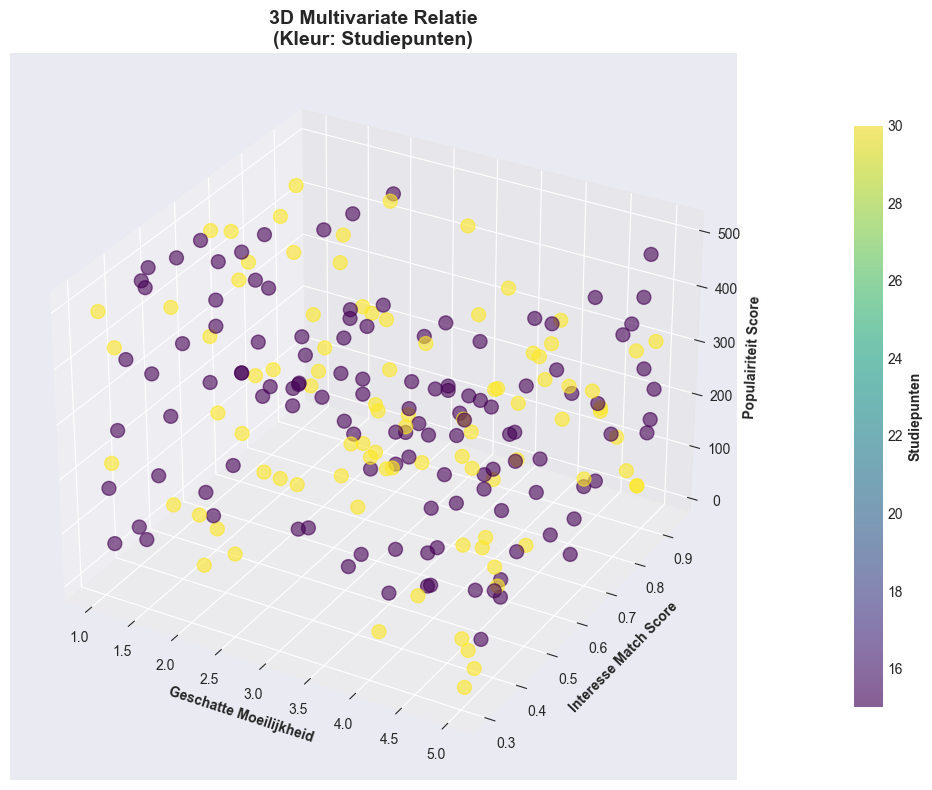

In [8]:
# 3.2 3D SPREIDINGSDIAGRAM - Interactie tussen Drie Variabelen
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['estimated_difficulty'], 
                     df['interests_match_score'], 
                     df['popularity_score'],
                     c=df['studycredit'], 
                     cmap='viridis', 
                     s=100, 
                     alpha=0.6)

ax.set_xlabel('Geschatte Moeilijkheid', fontweight='bold')
ax.set_ylabel('Interesse Match Score', fontweight='bold')
ax.set_zlabel('Populairiteit Score', fontweight='bold')
ax.set_title('3D Multivariate Relatie\n(Kleur: Studiepunten)', fontsize=14, fontweight='bold')

cbar = plt.colorbar(scatter, ax=ax, pad=0.1, shrink=0.8)
cbar.set_label('Studiepunten', fontweight='bold')

plt.tight_layout()
plt.show()

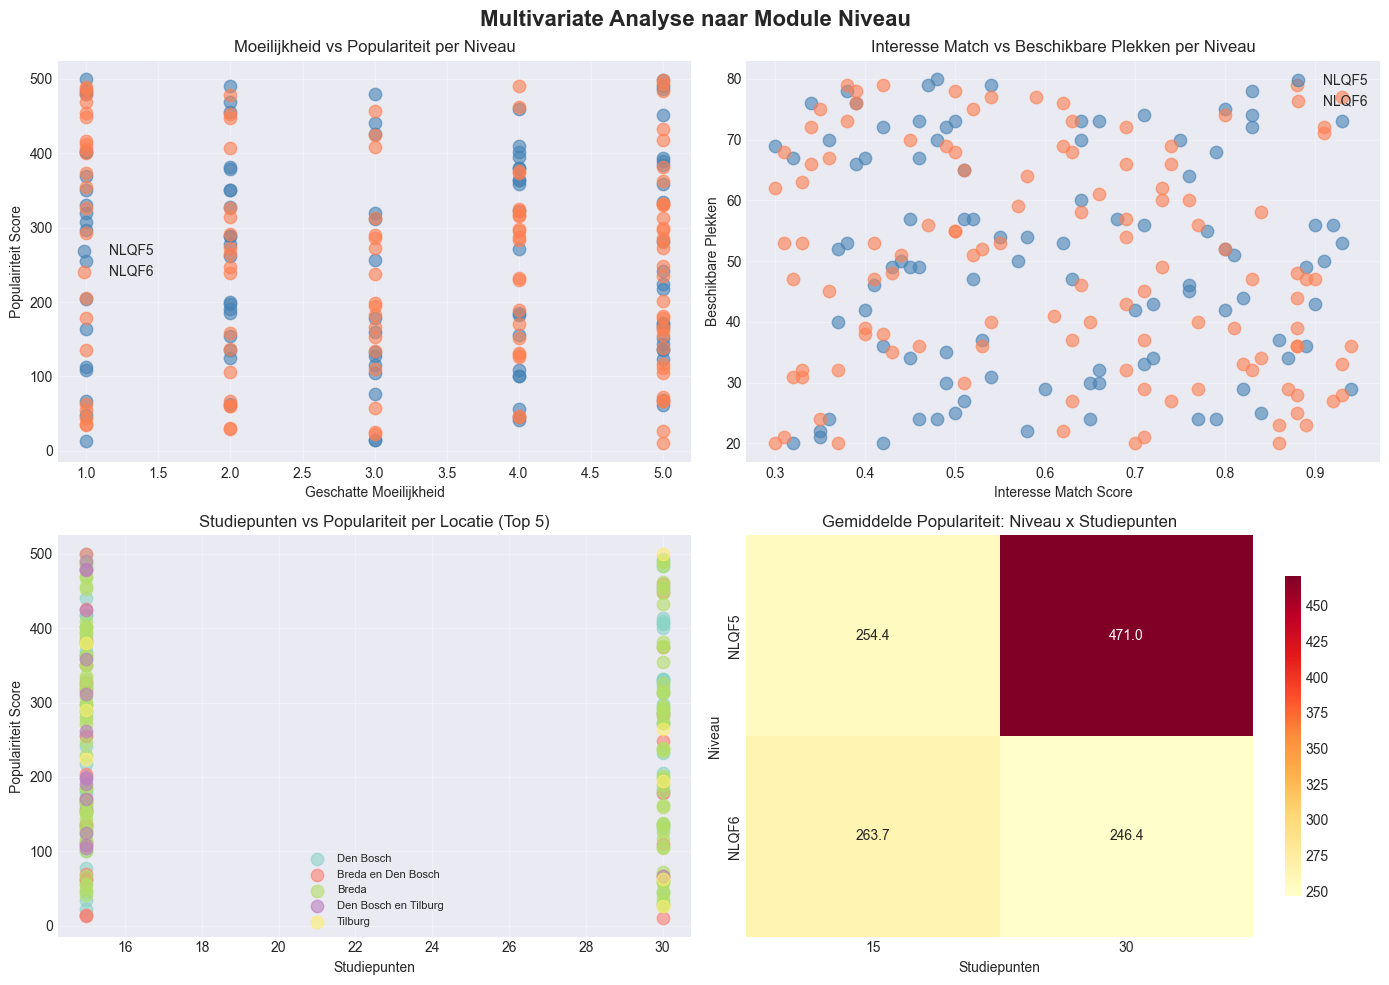


MULTIVARIATE INZICHTEN

Gemiddelde Populariteit per Niveau en Studiepunten:
studycredit          15          30
level                              
NLQF5        254.400000  471.000000
NLQF6        263.653846  246.420455


In [9]:
# 3.3 GEGROEPEERDE MULTIVARIATE ANALYSE - Hoe Niveau meerdere variabelen beïnvloedt
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Multivariate Analyse naar Module Niveau', fontsize=16, fontweight='bold')

levels = df['level'].unique()
colors = ['steelblue', 'coral']

# Spreidingsdiagram: Moeilijkheid vs Populariteit (gekleurd per Niveau)
for i, level in enumerate(levels):
    subset = df[df['level'] == level]
    axes[0, 0].scatter(subset['estimated_difficulty'], subset['popularity_score'], 
                       alpha=0.6, label=level, color=colors[i], s=80)
axes[0, 0].set_xlabel('Geschatte Moeilijkheid')
axes[0, 0].set_ylabel('Populairiteit Score')
axes[0, 0].set_title('Moeilijkheid vs Populariteit per Niveau')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Spreidingsdiagram: Interesse Match vs Beschikbare Plekken (gekleurd per Niveau)
for i, level in enumerate(levels):
    subset = df[df['level'] == level]
    axes[0, 1].scatter(subset['interests_match_score'], subset['available_spots'], 
                       alpha=0.6, label=level, color=colors[i], s=80)
axes[0, 1].set_xlabel('Interesse Match Score')
axes[0, 1].set_ylabel('Beschikbare Plekken')
axes[0, 1].set_title('Interesse Match vs Beschikbare Plekken per Niveau')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Spreidingsdiagram: Studiepunten vs Populariteit (gekleurd per Locatie)
locations = df['location'].unique()[:5]  # Top 5 locaties
colors_loc = plt.cm.Set3(np.linspace(0, 1, len(locations)))
for i, loc in enumerate(locations):
    subset = df[df['location'] == loc]
    axes[1, 0].scatter(subset['studycredit'], subset['popularity_score'], 
                       alpha=0.6, label=loc, color=colors_loc[i], s=80)
axes[1, 0].set_xlabel('Studiepunten')
axes[1, 0].set_ylabel('Populairiteit Score')
axes[1, 0].set_title('Studiepunten vs Populariteit per Locatie (Top 5)')
axes[1, 0].legend(fontsize=8)
axes[1, 0].grid(alpha=0.3)

# Heatmap: Gemiddelde Populariteit per Niveau en Studiepunten
pivot_table = pd.crosstab(df['level'], df['studycredit'], values=df['popularity_score'], aggfunc='mean')
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 1], cbar_kws={"shrink": 0.8})
axes[1, 1].set_title('Gemiddelde Populariteit: Niveau x Studiepunten')
axes[1, 1].set_xlabel('Studiepunten')
axes[1, 1].set_ylabel('Niveau')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("MULTIVARIATE INZICHTEN")
print("=" * 60)
print("\nGemiddelde Populariteit per Niveau en Studiepunten:")
print(pivot_table)

## 4. DATA KWALITEIT BEOORDELING
Uitschieterbesporing en data consistentie analyse

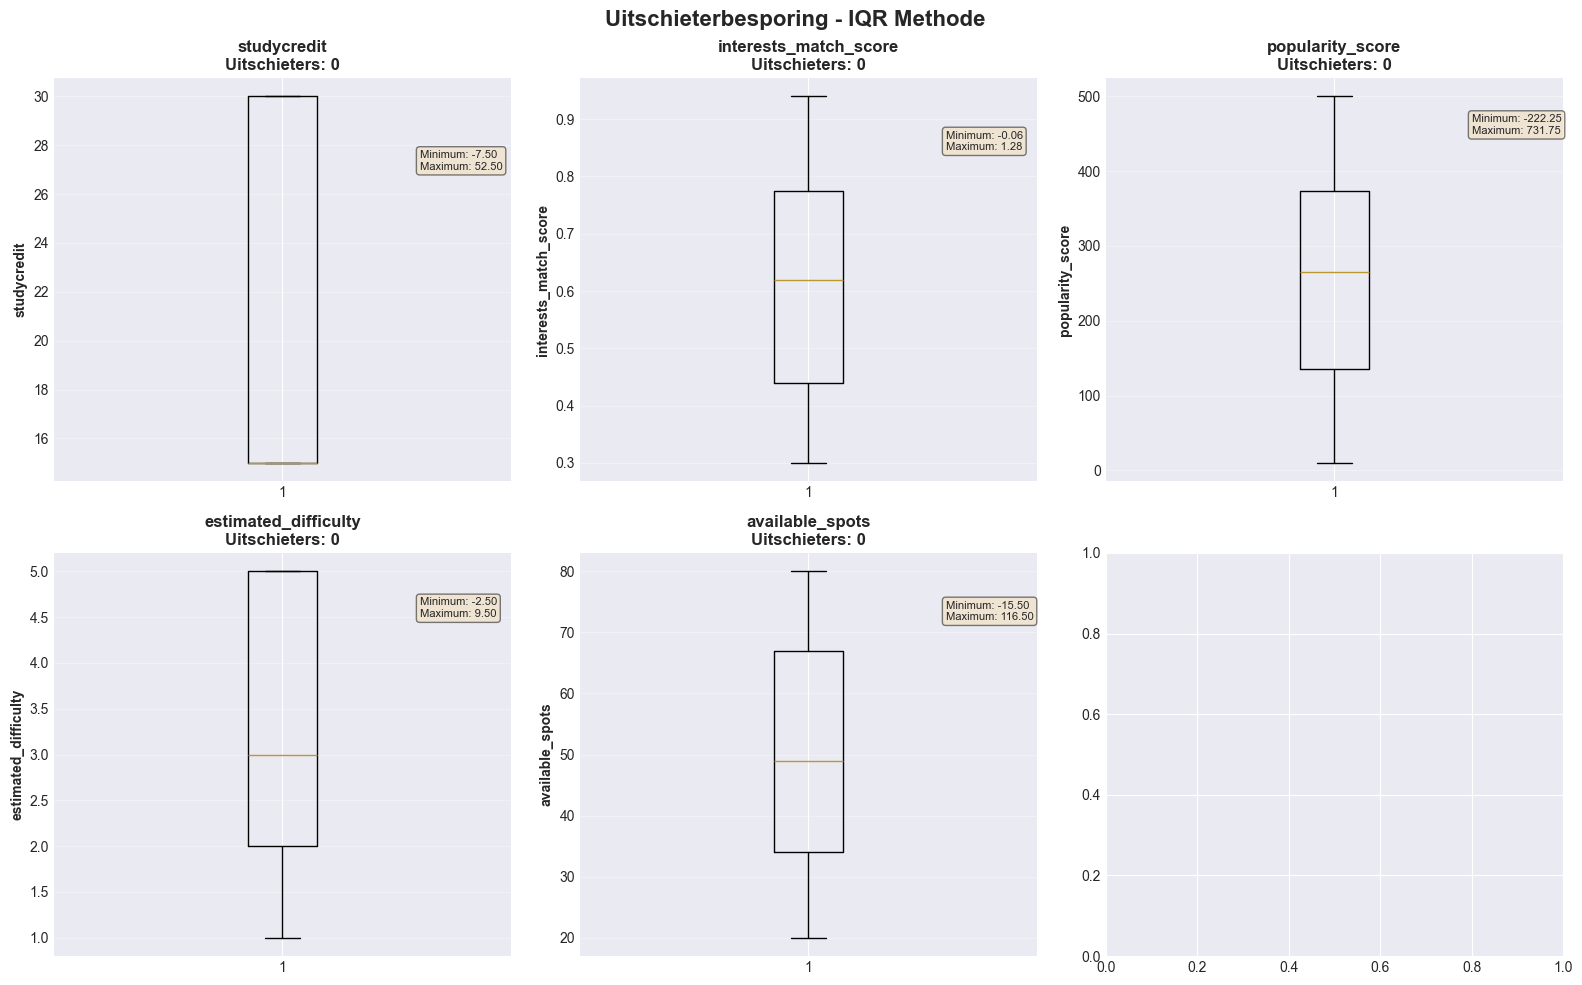


UITSCHIETERBESPORING ANALYSE

Aantal Uitschieters per Kolom (IQR Methode):
  studycredit: 0 uitschieters (0.0%)
  interests_match_score: 0 uitschieters (0.0%)
  popularity_score: 0 uitschieters (0.0%)
  estimated_difficulty: 0 uitschieters (0.0%)
  available_spots: 0 uitschieters (0.0%)


In [10]:
# 4.1 UITSCHIETERBESPORING - IQR Methode
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Uitschieterbesporing - IQR Methode', fontsize=16, fontweight='bold')

outlier_data = {}

for idx, col in enumerate(numerical_features):
    ax = axes[idx // 3, idx % 3]
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_data[col] = outlier_count
    
    # Maak boxplot
    bp = ax.boxplot(df[col], vert=True)
    ax.set_ylabel(col, fontweight='bold')
    ax.set_title(f'{col}\nUitschieters: {outlier_count}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Voeg tekst met grenzen toe
    textstr = f'Minimum: {lower_bound:.2f}\nMaximum: {upper_bound:.2f}'
    ax.text(1.3, df[col].max() * 0.9, textstr, fontsize=8, 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("UITSCHIETERBESPORING ANALYSE")
print("=" * 60)
print("\nAantal Uitschieters per Kolom (IQR Methode):")
for col, count in sorted(outlier_data.items(), key=lambda x: x[1], reverse=True):
    pct = (count / len(df)) * 100
    print(f"  {col}: {count} uitschieters ({pct:.1f}%)")

In [11]:
# 4.2 DATA VOLLEDIGHEID EN SAMENVATTING
print("\n" + "=" * 60)
print("SAMENVATTING DATA VOLLEDIGHEID")
print("=" * 60)

# Check ontbrekende waarden
print("\nOntbrekende Waarden (moeten 0 zijn na schoonmaken):")
missing_counts = df.isnull().sum()
if missing_counts.sum() == 0:
    print("  Geen ontbrekende waarden gedetecteerd - Data is volledig!")
else:
    print(missing_counts[missing_counts > 0])

# Check duplicaten
print(f"\nDuplicaat Rijen:")
print(f"  Totale duplicaten: {df.duplicated().sum()}")
print(f"  Duplicaten op ID: {df.duplicated(subset=['id']).sum()}")

# Samenvatting Gegevenstypen
print(f"\nSamenvatting Gegevenstypen:")
print(df.dtypes.value_counts())

# Unieke Waarden
print(f"\nUnieke Waarden per Kolom:")
print(df.nunique())

print("\n" + "=" * 60)
print("EDA SAMENVATTING")
print("=" * 60)
print(f"\nDataset: {df.shape[0]} modules met {df.shape[1]} features")
print(f"Geen ontbrekende waarden of duplicaten")
print(f"Belangrijkste bevindingen:")
print(f"  - Module niveaus: {df['level'].nunique()} verschillende niveaus")
print(f"  - Locaties: {df['location'].nunique()} verschillende locaties")
print(f"  - Populariteit bereik: {df['popularity_score'].min()} - {df['popularity_score'].max()}")
print(f"  - Gemiddelde moeilijkheid: {df['estimated_difficulty'].mean():.2f}/5")
print(f"  - Gemiddelde interesse match: {df['interests_match_score'].mean():.2f}")
print(f"\nEDA Analyse Voltooid!")


SAMENVATTING DATA VOLLEDIGHEID

Ontbrekende Waarden (moeten 0 zijn na schoonmaken):
  Geen ontbrekende waarden gedetecteerd - Data is volledig!

Duplicaat Rijen:
  Totale duplicaten: 0
  Duplicaten op ID: 0

Samenvatting Gegevenstypen:
object     9
int64      6
float64    1
Name: count, dtype: int64

Unieke Waarden per Kolom:
id                       211
name                     204
shortdescription         191
description              202
content                  202
studycredit                2
location                   5
contact_id                68
level                      2
learningoutcomes         146
module_tags              172
interests_match_score     62
popularity_score         176
estimated_difficulty       5
available_spots           60
start_date                99
dtype: int64

EDA SAMENVATTING

Dataset: 211 modules met 16 features
Geen ontbrekende waarden of duplicaten
Belangrijkste bevindingen:
  - Module niveaus: 2 verschillende niveaus
  - Locaties: 5 verschillend